# Exercise 6
Author: Elias Djupesland


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
sns.set_theme(style="darkgrid",palette="Paired")


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


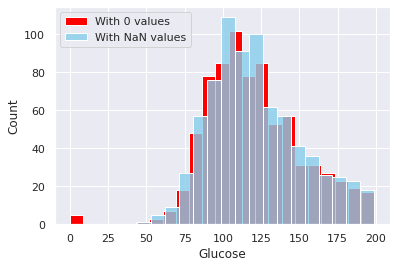

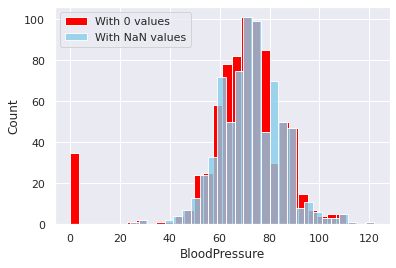

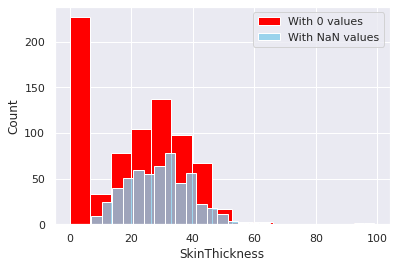

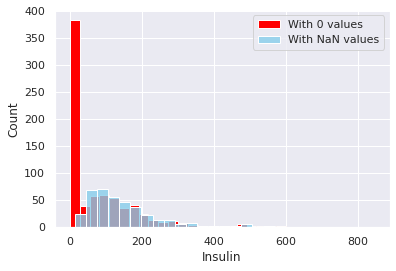

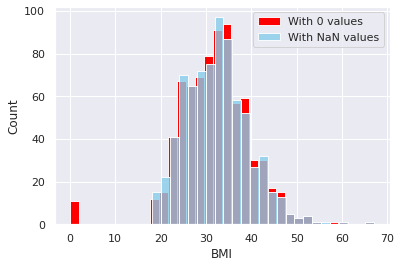

In [84]:
df = pd.read_csv('diabetes.csv')

columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
reduces_df = df[columns]

print((reduces_df == 0).sum())

def hist_nan(column):
    plt.figure("Histogram of "+column+" with missing values")
    sns.histplot( df[column] , color="red", label="With 0 values",  alpha=1)
    sns.histplot( df[column].replace({0:np.nan}) , color="skyblue", label="With NaN values", alpha=0.8)
    plt.legend()
    plt.show()

for c in columns:
    hist_nan(c)

In [114]:
df["Glucose"].replace(0, np.nan, inplace=True)
df["BloodPressure"].replace(0, np.nan, inplace=True)
df["SkinThickness"].replace(0, np.nan, inplace=True)
df["Insulin"].replace(0, np.nan, inplace=True)
df["BMI"].replace(0, np.nan, inplace=True)

X = df.drop('Outcome', 1)
y = df["Outcome"]

r=42
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.4, random_state=r)
X_test, X_val, y_test, y_val = train_test_split(X_test1, y_test1, test_size=0.5, random_state=r)

imr_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imr_mean = imr_mean.fit(X_train)
X_train_mean = imr_mean.transform(X_train)
X_val_mean = imr_mean.transform(X_val)

imr_median = SimpleImputer(missing_values=np.nan, strategy='median')
imr_median = imr_median.fit(X_train)
X_train_median = imr_median.transform(X_train)
X_val_median = imr_median.transform(X_val)

imr_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr_freq = imr_freq.fit(X_train)
X_train_freq = imr_freq.transform(X_train)
X_val_freq = imr_freq.transform(X_val)

#Mean
kn1 = KNeighborsClassifier()
kn1.fit(X_train_mean,y_train)
y_pred_mean = kn1.predict(X_train_mean)
print("Mean - train RMSE: " + str(mean_squared_error(y_train, y_pred_mean)))

kn2 = KNeighborsClassifier()
kn2.fit(X_val_mean,y_val)
y_pred_mean = kn2.predict(X_val_mean)
print("Mean - validation RMSE: " + str(mean_squared_error(y_val, y_pred_mean)))

# Median
kn3 = KNeighborsClassifier()
kn3.fit(X_train_median,y_train)
y_pred_median = kn3.predict(X_train_median)
print("Median - train RMSE: " + str(mean_squared_error(y_train, y_pred_median)))

kn4 = KNeighborsClassifier()
kn4.fit(X_val_median,y_val)
y_pred_median = kn4.predict(X_val_median)
print("Median - validation RMSE: " + str(mean_squared_error(y_val, y_pred_median)))

#Most frequent
kn5 = KNeighborsClassifier()
kn5.fit(X_train_freq,y_train)
y_pred_freq = kn4.predict(X_train_freq)
print("Most frequent - train RMSE: " + str(mean_squared_error(y_train, y_pred_freq)))

kn6 = KNeighborsClassifier()
kn6.fit(X_val_freq,y_val)
y_pred_freq = kn6.predict(X_val_freq)
print("Most frequent - validation RMSE: " + str(mean_squared_error(y_val, y_pred_freq)))

print("\n")

print("Using mean imputer on test set as it has the lowest RMSE on train and validation sets")
imr_mean_test = SimpleImputer(missing_values=np.nan, strategy='mean')
imr_mean_test = imr_mean_test.fit(X_test)
X_test_mean = imr_mean_test.transform(X_test)

kn_test = KNeighborsClassifier()
kn_test.fit(X_test_mean,y_test)
y_pred_test = kn4.predict(X_test_mean)
print("Mean - test RMSE: " + str(mean_squared_error(y_test, y_pred_test)))


Mean - train RMSE: 0.18478260869565216
Mean - validation RMSE: 0.24675324675324675
Median - train RMSE: 0.18695652173913044
Median - validation RMSE: 0.2727272727272727
Most frequent - train RMSE: 0.26956521739130435
Most frequent - validation RMSE: 0.2597402597402597


Using mean imputer on test set as it has the lowest RMSE on train and validation sets
Mean - test RMSE: 0.3246753246753247


K-Neighbours classifier using only ticket fare
RMSE: 0.29608938547486036

K-Neighbours classifier using ticket fare, and title of passanger
RMSE: 0.24581005586592178

We see that the RMSE is lower for the classifier using both fare and title


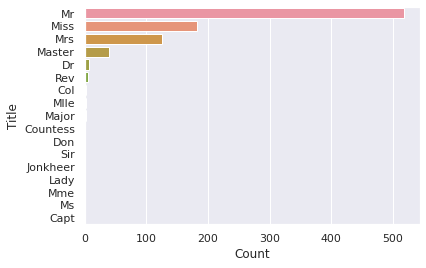

In [227]:
df = pd.read_csv('titanic.csv')

titles = df["Name"].str.extract(" ([A-Za-z]+)\.")
df["Title"] = titles
indexes_tuple = titles.value_counts().index.to_list()
indexes = [item for t in indexes_tuple for item in t]
titles_count= titles.value_counts().tolist()

sns.barplot(y=indexes,x=titles_count)
plt.xlabel('Count')
plt.ylabel('Title')

allowed_titles = ["Master", "Miss", "Mr", "Mrs"]
df.loc[~df["Title"].isin(allowed_titles), "Title"] = "Other"

mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Other': 5}
df.replace({'Title': mapping})
df.Title= [mapping[item] for item in df.Title]

def neigh(X,y):
    r=42
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=r)
    kn = KNeighborsClassifier()
    kn.fit(X_train,y_train)
    y_pred = kn.predict(X_val)
    print("RMSE: " + str(mean_squared_error(y_val, y_pred))+"\n")


X = df["Fare"].to_numpy().reshape(-1,1)
y = df["Survived"].ravel()

print("K-Neighbours classifier using only ticket fare")
neigh(X,y)

X = df[["Fare","Title"]]
print("K-Neighbours classifier using ticket fare, and title of passenger")
neigh(X,y)

print("We see that the RMSE is lower for the classifier using both fare and title")